Freeze-out: particles will stay in thermal equilibrium with the universe as long as the reactions keeping them in chemical equilibrium are proceeding at a rate higher than the expansion of the universe. If the expansion rate is faster than the reaction rate, the partices can no longer stay in equilibrium with the universe; they are 'frozen out'.

## TODO:
Plot H for cold dark matter (T_fo << m).

Rearrange cells in a proper order, import everything at start

## done:
Write functions to calculate the equilibrium number density of particles as a function of temperature (for the relativistic and non-relativistic cases).

Write functions to calculate the Hubble constant and g_{*S} as a function of temperature.

Plot the present-day abundance (Omega) of hot dark matter (where T_fo >> m) for different masses and cross sections. How does it scale with these variables?

Use the equipartition theorem to find the velocity of cold DM (currently approximated as c)

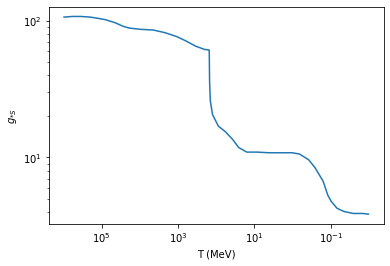

In [5]:
#extract gstar from data
gstar_data = np.genfromtxt('gstar.csv', delimiter=',')
plt.plot(gstar_data[:,0],gstar_data[:,1])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$g_{*S}$')
plt.xlabel('T (MeV)')
plt.gca().invert_xaxis()
plt.show()

def gstar(T):
    return np.interp(T,gstar_data[:,0], gstar_data[:,1])

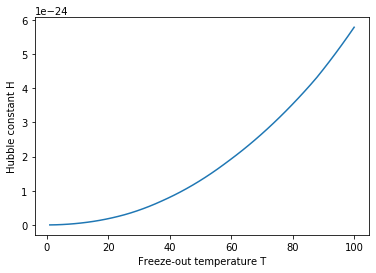

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

#plot Hubble constant at various temperatures
T_vect = np.linspace(1,100);
H_vect = [];
m = 1;
sigma = 1;
for T in T_vect:
    H_vect.append(H(T));
plt.plot(T_vect,H_vect);
plt.xlabel("Freeze-out temperature T");
plt.ylabel("Hubble constant H");
plt.show();

In [25]:
#define functions for converting between temperature T and
#scale factor a
from scipy.optimize import fsolve

T_0 = 0.235*10**(-3)
def T_to_a(T):
    return (gstar(T_0)/gstar(T))**(1/3)*(T_0/T)
def a_to_T(a):
    func = lambda T: a**3*(gstar(T))*T**3-gstar(T_0)*T_0**3
    T_initial_guess = gstar(T_0)**(1/3)*(T_0/a)
    T_solution = fsolve(func, T_initial_guess)
    return T_solution[0]

In [57]:
#define parameters and functions for calculating
#present-day abundance of DM
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

#all parameters in natural units
G_F = 1.1663787*10**(-5)/((10**9)**2)
M_pl = 2.435*10**18*10**9
k_B = 1
c = 1
#assuming DM particles to be fermions
g = 2
crit_density = 8.07*10**(-47)*10**36

#rough approximations of H, n, and sigma. Replace freely
def H(T):
    return np.pi/3*(gstar(T)/10)**(1/2)*(T**2)/M_pl

#assuming DM particles to be fermions. rel = True -> hot DM
def n(T,rel=True,m=0):
    if rel:
        return 3/4*scipy.special.zeta(3)/(np.pi**2)*g*T**3
    else:
        if m == 0:
            raise Exception("for cold DM, mass needs to be specified")
        else:
            return g*(m*T/(2*np.pi))**(3/2)*np.exp(-m/T)

#average velocity of DM. Default = hot DM.
def v(T,rel=True,m=0):
    if rel == True:
        return c
    else:
        if m == 0:
            raise Exception("for cold DM, mass needs to be specified")
        else:
            return (3*k_B*T/m)**(1/2)

#cross-section of DM self-interaction. The parameter alpha can be varied for
#easy plotting of different values of sigma
def sigma(T,alpha=1):
    return alpha*(G_F**2)*(T**2)
    
#solve for freeze-out temperature T_fo
def T_fo_solver(rel=True,alpha=1,m=0):
    def composite(T):
        return H(T) - (n(T,rel=rel,m=m)*v(T,rel=rel,m=m)*sigma(T,alpha))
    return scipy.optimize.root_scalar(composite,bracket=[-10**9,10**9],x0=10)

#present-day abundance of dark matter
def Omega(T,m,rel=True):
    return dm_density(T,m,rel)/crit_density

#dark matter density TODAY. n is the DM density at the decoupling, which needs
#to be multiplied by a scaling factor a^-3 accounting for expansion
def dm_density(T,m,rel=True):
    return m*n(T,rel,m)*T_to_a(T)**3

## Hot dark matter

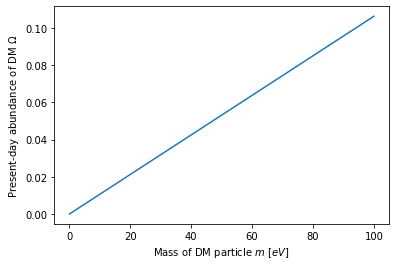

In [54]:
#plot Omega as a fn of m with constant sigma
m_vect = np.linspace(0.1,100,100)
Omega_vect = []
for m in m_vect:
    Omega_vect.append(Omega(T_fo_solver(True).root,m))
    
plt.plot(m_vect,Omega_vect)
plt.xlabel("Mass of DM particle $m$ [$eV$]")
plt.ylabel("Present-day abundance of DM $\Omega$")
plt.show()

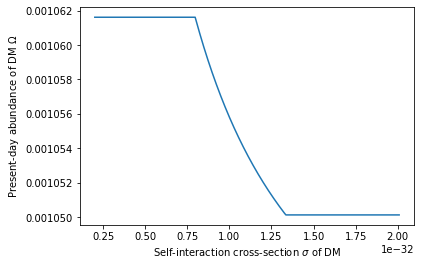

In [58]:
#plot Omega as a fn of sigma with constant m. parameter alpha
#defined for ease of plotting, see fn sigma
m_const = 1
alpha_vect = np.linspace(1,1000,10000)
sigma_vect = []
Omega_vect = []
for alpha in alpha_vect:
    T_fo = T_fo_solver(True,alpha).root
    #print(T_fo) #sanity check for freeze-out temperatures
    sigma_vect.append(alpha*G_F**2*T_fo**2)
    Omega_vect.append(Omega(T_fo,m_const))
plt.plot(sigma_vect,Omega_vect)
plt.xscale('linear')
plt.xlabel("Self-interaction cross-section $\sigma$ of DM")
plt.ylabel("Present-day abundance of DM $\Omega$")
plt.show()

## Cold dark matter

In [59]:
#plot Omega as a fn of m with constant sigma
m_vect = np.linspace(10**9,10*10**12)
Omega_vect = []
for m in m_vect:
    print(T_fo_solver(False,1,m).root)
    Omega_vect.append(Omega(T_fo_solver(False,1,m).root,m,False))
    
plt.plot(m_vect,Omega_vect)
plt.xlabel("Mass of DM particle $m$ [$eV$]")
plt.ylabel("Present-day abundance of DM $\Omega$")
plt.show()

0.0


/home/anders/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/anders/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/home/anders/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


ZeroDivisionError: float division by zero

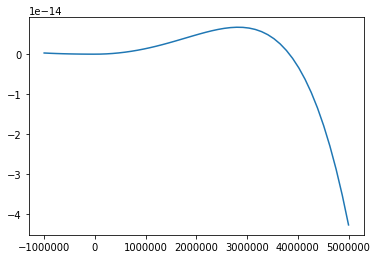

      converged: True
           flag: 'converged'
 function_calls: 63
     iterations: 62
           root: 3835697.6820752607

In [49]:
#sanity check for T_fo_solver. Plot composite function for hot DM, make sure that the roots are valid
def T_fo_solver(rel=True):
    def composite(T):
        return H(T) - (n(T)*v(T,rel)*sigma(T))
    T_vect = np.linspace(-10**6,5*10**6)
    composite_vect = []
    for i in T_vect:
        composite_vect.append(composite(i))
    plt.plot(T_vect,composite_vect)
    plt.show()
    return scipy.optimize.root_scalar(composite,bracket=[-10**12,10**9],x0=0)

T_fo_solver()


$T_{fo} \sim MeV$. Reasonable, as this is approximately the freeze-out temperature of neutrinos.  We're treating very light DM particles of relativistic speeds - basically neutrinos.

In [51]:
#sanity check for T_fo_solver. Plot composite function for cold DM, make sure that the roots are valid
def T_fo_solver(rel=True):
    def composite(T):
        return H(T) - (n(T)*v(T,rel)*sigma(T))
    T_vect = np.linspace(-10**6,5*10**6)
    composite_vect = []
    for i in T_vect:
        composite_vect.append(composite(i))
    plt.plot(T_vect,composite_vect)
    plt.show()
    return scipy.optimize.root_scalar(composite,bracket=[-10**12,10**9],x0=0)

T_fo_solver(False)


Exception: for cold DM, mass needs to be specified